In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
# Get a list of all reflected classes
reflected_classes = Base.classes.keys()

# Print the list of reflected classes
for cls in reflected_classes:
    print(cls)

measurement
station


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Example query using the session
measurements = session.query(Measurement).all()

for measurement in measurements:
    print(measurement.date, measurement.tobs)


2010-01-01 65.0
2010-01-02 63.0
2010-01-03 74.0
2010-01-04 76.0
2010-01-06 73.0
2010-01-07 70.0
2010-01-08 64.0
2010-01-09 68.0
2010-01-10 73.0
2010-01-11 64.0
2010-01-12 61.0
2010-01-14 66.0
2010-01-15 65.0
2010-01-16 68.0
2010-01-17 64.0
2010-01-18 72.0
2010-01-19 66.0
2010-01-20 66.0
2010-01-21 69.0
2010-01-22 67.0
2010-01-23 67.0
2010-01-24 71.0
2010-01-25 67.0
2010-01-26 76.0
2010-01-27 68.0
2010-01-28 72.0
2010-01-30 70.0
2010-01-31 67.0
2010-02-01 66.0
2010-02-03 67.0
2010-02-04 69.0
2010-02-05 67.0
2010-02-06 67.0
2010-02-07 64.0
2010-02-08 69.0
2010-02-09 73.0
2010-02-11 73.0
2010-02-12 69.0
2010-02-13 69.0
2010-02-14 69.0
2010-02-15 71.0
2010-02-16 61.0
2010-02-17 69.0
2010-02-19 63.0
2010-02-20 64.0
2010-02-21 65.0
2010-02-22 67.0
2010-02-23 68.0
2010-02-24 65.0
2010-02-25 76.0
2010-02-26 75.0
2010-02-28 66.0
2010-03-01 70.0
2010-03-02 72.0
2010-03-03 73.0
2010-03-04 70.0
2010-03-05 71.0
2010-03-06 72.0
2010-03-07 72.0
2010-03-08 69.0
2010-03-09 70.0
2010-03-11 73.0
2010-03-

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print("The most recent date in the data set:", most_recent_date)

The most recent date in the data set: 2017-08-23


Text(0, 0.5, 'Inches')

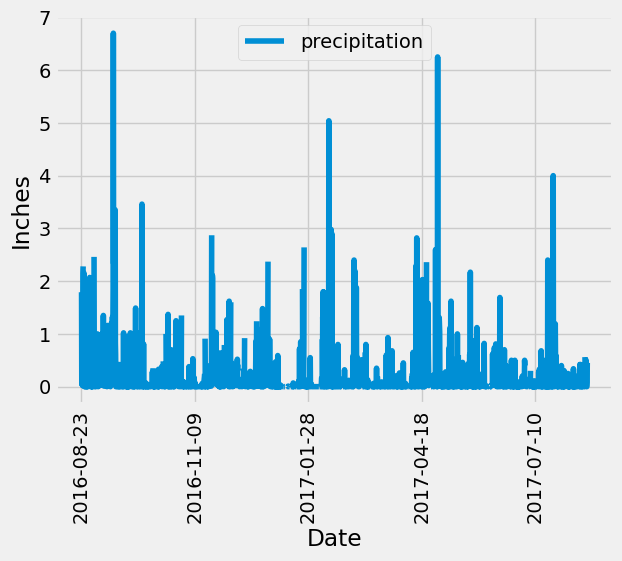

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
 


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

# Save the query results as a Pandas DataFrame with explicit column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Calculate summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()

# Print the summary statistics
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
# Query to retrieve data and precipitation scores for the specified date range
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

# Save the query results as a Pandas DataFrame with explicit column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Calculate summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()

# Print the summary statistics
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
for station, observation_count in most_active_stations:
    print(f"Station: {station}, Observation Count: {observation_count}")

Station: USC00519281, Observation Count: 2772
Station: USC00519397, Observation Count: 2724
Station: USC00513117, Observation Count: 2709
Station: USC00519523, Observation Count: 2669
Station: USC00516128, Observation Count: 2612
Station: USC00514830, Observation Count: 2202
Station: USC00511918, Observation Count: 1979
Station: USC00517948, Observation Count: 1372
Station: USC00518838, Observation Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
    
# Get the most active station ID from the query result
most_active_station_id = most_active_station[0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).first()

# Print the temperature statistics
min_temperature, max_temperature, avg_temperature = temperature_stats
print(f"Most Active Station: {most_active_station_id}")
print(f"Lowest Temperature: {min_temperature}°F")
print(f"Highest Temperature: {max_temperature}°F")
print(f"Average Temperature: {avg_temperature:.2f}°F")


Most Active Station: USC00519281
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66°F


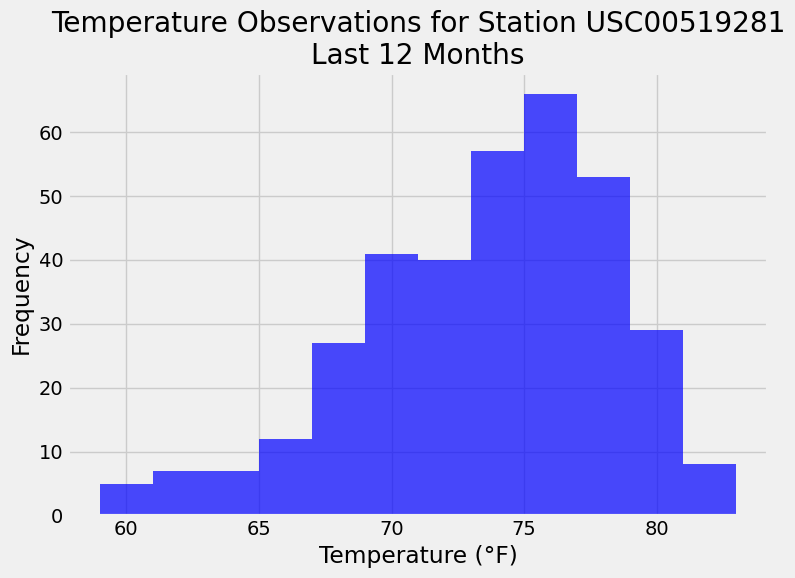

In [15]:
# Using the most active station id
# Get the most active station ID from the query result
most_active_station_id = most_active_station[0]
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_ago_str).all()
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')
# Load the query results into a list
temperature_list = [temperature[0] for temperature in temperature_data]

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_list, bins=12, color='blue', alpha=0.7)
plt.title(f"Temperature Observations for Station {most_active_station_id}\nLast 12 Months")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()